Train a CNN model on the CIFAR-10 dataset to classify images into 10 categories like airplanes, cats, trucks, etc

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Flatten, Conv2D, MaxPooling2D

In [2]:
#Load and normalize CIFAR-10 dataset
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()
X_train=X_train/255.0
X_test=X_test/255.0
y_train=y_train.squeeze()
y_test=y_test.squeeze()

170498071/170498071 [==============================] - 90s 1us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
#Define CNN model
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1,verbose=1)

Epoch 1/10
1407/1407 [==============================] - 61s 42ms/step - loss: 1.4760 - accuracy: 0.4703 - val_loss: 1.2230 - val_accuracy: 0.5730
Epoch 2/10
1407/1407 [==============================] - 48s 34ms/step - loss: 1.1416 - accuracy: 0.5977 - val_loss: 1.0469 - val_accuracy: 0.6438
Epoch 3/10
1407/1407 [==============================] - 44s 31ms/step - loss: 1.0005 - accuracy: 0.6502 - val_loss: 1.0178 - val_accuracy: 0.6488
Epoch 4/10
1407/1407 [==============================] - 52s 37ms/step - loss: 0.9073 - accuracy: 0.6842 - val_loss: 0.9395 - val_accuracy: 0.6760
Epoch 5/10
1407/1407 [==============================] - 43s 31ms/step - loss: 0.8264 - accuracy: 0.7121 - val_loss: 0.8957 - val_accuracy: 0.6988
Epoch 6/10
1407/1407 [==============================] - 44s 31ms/step - loss: 0.7568 - accuracy: 0.7347 - val_loss: 0.8869 - val_accuracy: 0.6974
Epoch 7/10
1407/1407 [==============================] - 46s 33ms/step - loss: 0.6959 - accuracy: 0.7567 - val_loss: 0.9289 -

In [10]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}")

Test loss: 1.012, Test accuracy: 0.684


1/1 [==============================] - 0s 44ms/step


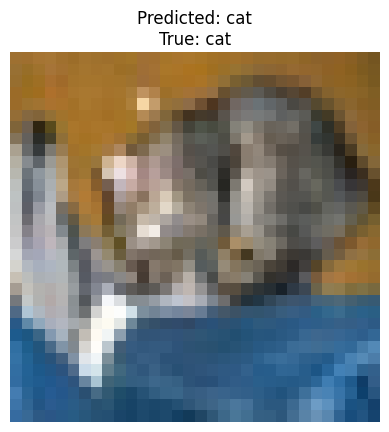

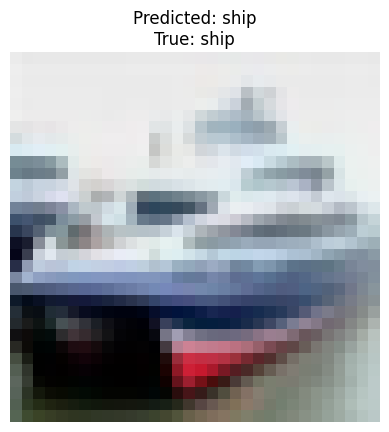

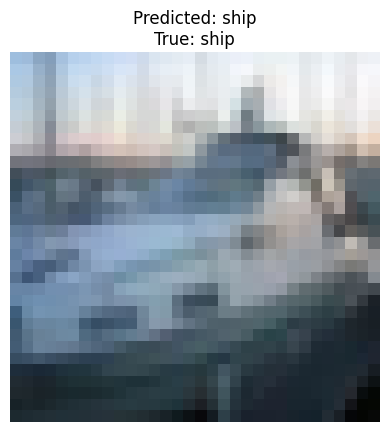

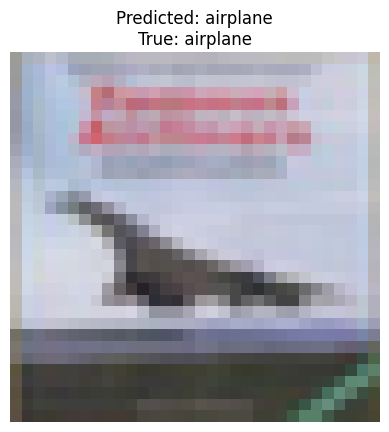

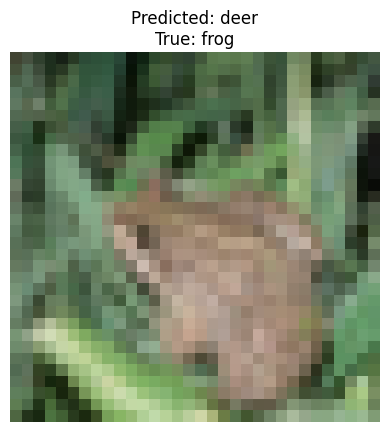

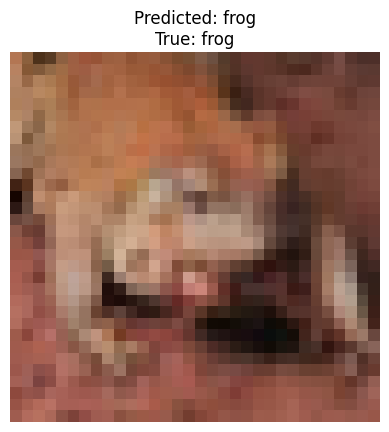

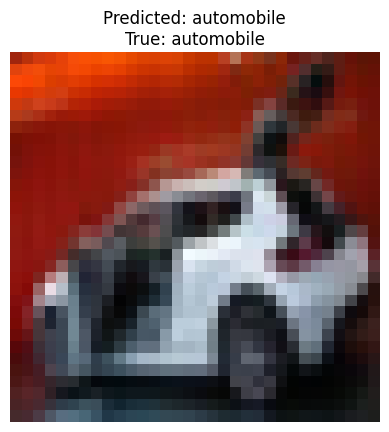

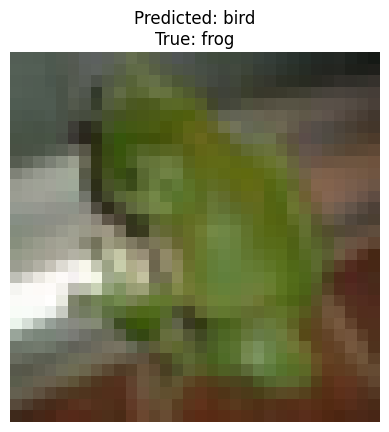

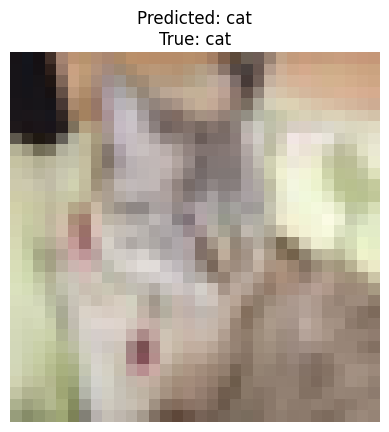

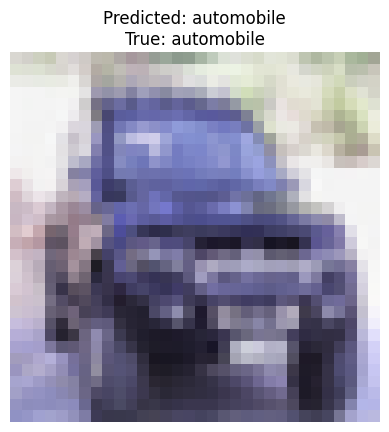

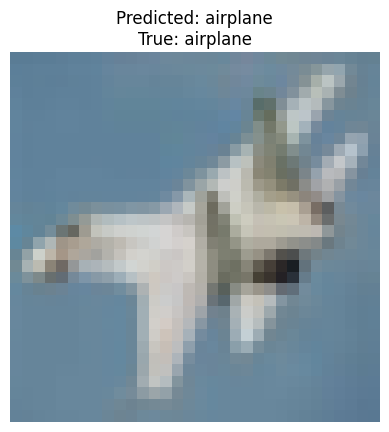

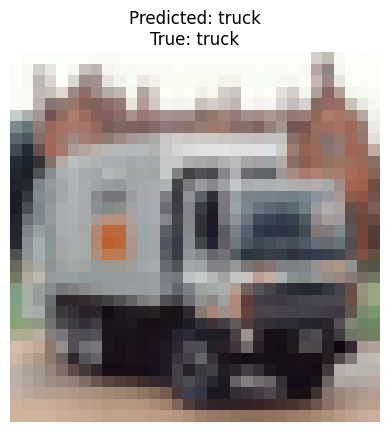

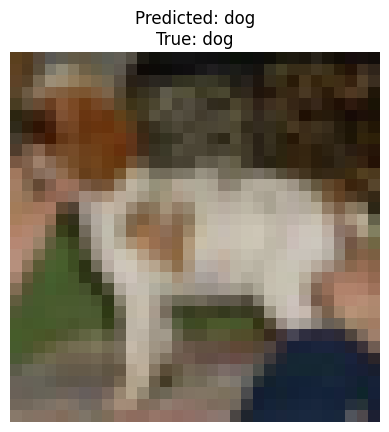

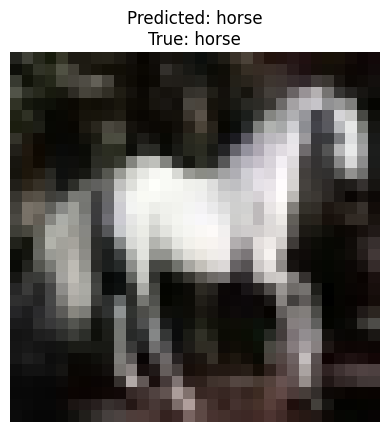

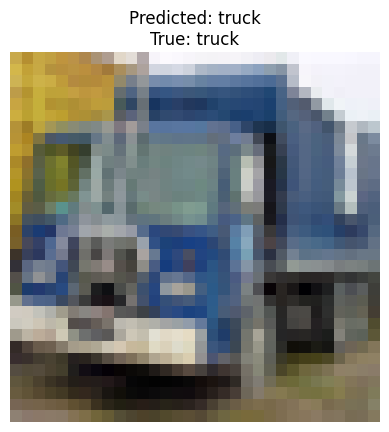

In [14]:
preds = model.predict(X_test[:15])
for i, pred in enumerate(preds):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_names[tf.argmax(pred)]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
    plt.show()

